# Analyzing NSW Public Transports Usage - Opal Cards' Tap-ons and Tap-offs

## Problem Tasks: 
- Examine the Opal usage data from Transport NSW and identify the patterns of different transport modes including bus, rail and ferry. 
- Having collected data about average income and age range of NSW people, we apply a suitable analysis technique in order to decide if there is a relationship between transport usage and a specific factor.

# Dataset:
* **_Relationship between Tap-ons and Tap-off Opal Card_**
* **_Prediction of Transport Uses Based on Personal Weekly Income_** 
* **_Prediction of Transport Uses Based on Age Group_**
* **_Identifying and Clustering the Uses of Transport Modes_**

# Import Necessary Functions

In [3]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std

# Plot
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
from sklearn.metrics import plot_confusion_matrix

# Functions used for linear regression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics

# Functions used for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

# Functions used for K-Nearest Neighbours Classifier
from sklearn.neighbors import KNeighborsClassifier

# Functions used for Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Functions used for Neural Network
from sklearn.neural_network import MLPClassifier

# Functions used for Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from scipy.spatial.distance import pdist 

# Ignore Warning
import warnings
warnings.filterwarnings("ignore")

# Relationship between Tap-ons and Tap-offs of Opal Card

## Data Summary and Manipulation

We use the dataset about the tap-on and tap-off rates of Opal cards which can be obtained from [Transport NSW page](https://www.transport.nsw.gov.au/data-and-research/travel-insights?fbclid=IwAR1Bx6GzgoeFsDrZw9JYehj_ARCbovy1VZHGvJ61T00RExMrGxqUh7_LUi4) -- which is to record the number of passengers who take the public transports daily(these satistical data includes passengers of all modes of transports). Opal card is the transport card which is used to tap on when entering the station, and to tap off when exit from the station in destination.We choose the tap-on and tap-off data from four suburbs in Greater Sydney, NSW, Australia for our dataset, which includes Macquarie Parks, Strathfield, Parramatta and Chatswood; we then collect the data from the [Transport NSW page](https://www.transport.nsw.gov.au/data-and-research/travel-insights?fbclid=IwAR1Bx6GzgoeFsDrZw9JYehj_ARCbovy1VZHGvJ61T00RExMrGxqUh7_LUi4), and create an Excel dataset `Mac Park vs the rest of Syd.xlsx`. The dataset contains the records of tap-on events and tap-off events of the four suburbs from 30 August 2021 to 19 September 2021.

*_Process:_*
- Data summary and manipulation: Group data based on the distance of two nearby suburbs.
- Data exploration: Plot graphs to check the correlation between tap-ons and tap-offs in two distinct suburbs. 
- Model building: Build a linear regression model to predict the number of tap-on events at one suburb based on the tap-off events at the nearby suburb.

*_Aim:_*

To let passenger plan ahead based on the traveling trends under the Covid-19 circumstance, especially in the key commercial centres such as Parramatta and Chatswood where high volume of transport uses are found.

### Import File and Create a Dataframe

In [2]:
# Import the own-created Excel file and convert into the dataframe
df_taps = pd.read_excel("File/Mac Park vs the rest of Syd.xlsx", index_col = 0)
df_taps.head(4)

,Suburbs,Tap-ons,Tap-offs
Dates,,,
30/8/2021,Macquarie Park,3700,3300
30/8/2021,Parramatta,9700,9200
30/8/2021,Strathfield,1900,1400
30/8/2021,Chatswood,5000,4900


### Summarise the Dataset

In [3]:
# the columns and rows of the dataset
print("the number of rows in the dataset:",df_taps.shape[0])
print("the number of columns in the dataset:",df_taps.shape[1])

the number of rows in the dataset: 84
the number of columns in the dataset: 3


In [4]:
# summarise the tap-on and tap-off rates over the recorded days
df_taps.describe()

,Tap-ons,Tap-offs
count,84.000000,84.000000
mean,4647.619048,4303.571429
std,2947.348254,2909.247674
min,900.000000,300.000000
25%,2000.000000,1700.000000
50%,3950.000000,3600.000000
75%,5700.000000,5500.000000
max,11000.000000,10500.000000


In [5]:
# Check the number of records in each Suburb
df_taps['Suburbs'].value_counts()

Strathfield       21
Chatswood         21
Macquarie Park    21
Parramatta        21
Name: Suburbs, dtype: int64

* **_comment:_** There are 21 records (21 days) on the tap-on events and tap-off events in each suburb.

We separate the records for each distinct suburb.

In [6]:
# Group the dataframe based on Suburbs
mac_taps = df_taps[df_taps.Suburbs == "Macquarie Park"]
chats_taps = df_taps[df_taps.Suburbs == "Chatswood"]
strath_taps = df_taps[df_taps.Suburbs == "Strathfield"]
parra_taps = df_taps[df_taps.Suburbs == "Parramatta"]

In [7]:
# Summarise the tap-on and tap-off rate for each suburb
print("Summary of Macquarie Park:\n", mac_taps.describe())
print("\nSummary of Chatswood:\n", chats_taps.describe())
print("\nSummary of Strathfield:\n", strath_taps.describe())
print("\nSummary of Parramatta:\n", parra_taps.describe())

Summary of Macquarie Park:
            Tap-ons     Tap-offs
count    21.000000    21.000000
mean   3342.857143  3085.714286
std     889.140837   895.704033
min    1500.000000   900.000000
25%    2600.000000  2500.000000
50%    3800.000000  3500.000000
75%    3900.000000  3600.000000
max    4200.000000  4100.000000

Summary of Chatswood:
            Tap-ons     Tap-offs
count    21.000000    21.000000
mean   4800.000000  4609.523810
std    1196.244122  1135.739742
min    1900.000000  1900.000000
25%    4100.000000  4000.000000
50%    5300.000000  5100.000000
75%    5700.000000  5400.000000
max    5900.000000  5600.000000

Summary of Strathfield:
            Tap-ons     Tap-offs
count    21.000000    21.000000
mean   1723.809524  1266.666667
std     418.216166   468.330368
min     900.000000   300.000000
25%    1300.000000   900.000000
50%    2000.000000  1500.000000
75%    2000.000000  1600.000000
max    2100.000000  1700.000000

Summary of Parramatta:
             Tap-ons      Tap-offs

* **_Interpretation:_**

From the summary, we can conclude that Parramatta was the busiest stop (all transport modes) in the period from 30 August to 19 September in 2021, which the average tap-ons and tap-offs of Opal Card (number of passengers) were up to roughly 8724 and 8252 respectively. The least busy transport stop was in Strathfield, where the average tap-on rate was nearly 1724 and the average tap-off rate was 1267.

### Group Data based on nearby Suburbs

* **_Comment:_**

We group two suburbs which are nearby in order to prepare for building the model of regression. In this case, we group Macquarie Park and Chatswood since the stations of these two suburbs are nearby, and also they include Metro service. On the other hand, we group Parramatta and Strathfield based on the distance (both located on the West side of Sydney). 

*_NOTE:_* we will not include the column "Suburbs" in our grouped datasets, since we only include either tap-ons or tap-offs of a suburb when grouping. For example, if we only include the tap-ons in Macquarie Park, then we group with the Tap-offs of Chatswood (include "Suburbs" column). This then leads to the confusion that whether the "Tap-ons" column is referred to Chatswood or Macquarie Park. Therefore, **we only include the "Tap-ons" of one suburb and the "Tap-offs" of another suburb, then change the column names according to their suburbs (e.g. "Tap-ons" to "Tap-ons (Mac Park)")**.

**First Group:** we group Macquarie Park and Chatswood

* _Tap-ons of Macquarie Park and Tap-offs of Chatswood_

In [8]:
# create a temporary dataframe that drops the unrelated columns
temp = mac_taps.drop(['Suburbs', 'Tap-offs'],1)

# Add a tap-offs of Chatswood and rename the columns to clearly state which column belongs to which suburb
mac_chats_taps = temp.rename(columns = {'Tap-ons':'Tap-ons (Mac Park)'})
mac_chats_taps['Tap-offs (Chatswood)'] = chats_taps['Tap-offs']
mac_chats_taps.head(3)

,Tap-ons (Mac Park),Tap-offs (Chatswood)
Dates,,
30/8/2021,3700,4900
31/8/2021,3700,4800
1/9/2021,3700,5400


* _Tap-ons of Chatswood and Tap-offs of Macquarie Park_

In [9]:
# create a temporary dataframe that drops the unrelated columns
temp = chats_taps.drop(['Suburbs', 'Tap-offs'],1)

# Add a tap-offs of Macquarie Park and rename the columns to clearly state which column belongs to which suburb
chats_mac_taps = temp.rename(columns = {'Tap-ons':'Tap-ons (Chatswood)'})
chats_mac_taps['Tap-offs (Mac Park)'] = mac_taps['Tap-offs']
chats_mac_taps.head(3)

,Tap-ons (Chatswood),Tap-offs (Mac Park)
Dates,,
30/8/2021,5000,3300
31/8/2021,5200,3100
1/9/2021,5200,3500


**Second Group:** We group Strathfield and Parramatta

* _Tap-ons of Strathfield and Tap-offs of Parramatta_

In [10]:
# create a temporary dataframe that drops the unrelated columns
temp = strath_taps.drop(['Suburbs', 'Tap-offs'],1)

# Add a tap-offs of Chatswood and rename the columns to clearly state which column belongs to which suburb
strath_parra_taps = temp.rename(columns = {'Tap-ons':'Tap-ons (Strathfield)'})
strath_parra_taps['Tap-offs (Parramatta)'] = parra_taps['Tap-offs']
strath_parra_taps.head(3)

,Tap-ons (Strathfield),Tap-offs (Parramatta)
Dates,,
30/8/2021,1900,9200
31/8/2021,1800,9100
1/9/2021,2000,9200


* _Tap-ons of Parramatta and Tap-offs of Strathfield_

In [11]:
# create a temporary dataframe that drops the unrelated columns
temp = parra_taps.drop(['Suburbs', 'Tap-offs'],1)

# Add a tap-offs of Macquarie Park and rename the columns to clearly state which column belongs to which suburb
parra_strath_taps = temp.rename(columns = {'Tap-ons':'Tap-ons (Parramatta)'})
parra_strath_taps['Tap-offs (Strathfield)'] = strath_taps['Tap-offs']
parra_strath_taps.head(3)

,Tap-ons (Parramatta),Tap-offs (Strathfield)
Dates,,
30/8/2021,9700,1400
31/8/2021,9400,1300
1/9/2021,9800,1600


## Data Exploration

### Plotting to check if the variables are roughly correlated

We use Seaborn regression plot to see if the tap-on events of one suburb are correlated with the tap-off events at other suburb

**First Group (Macquarie Park v.s. Chatswood):**

[(500.0, 6500.0)]

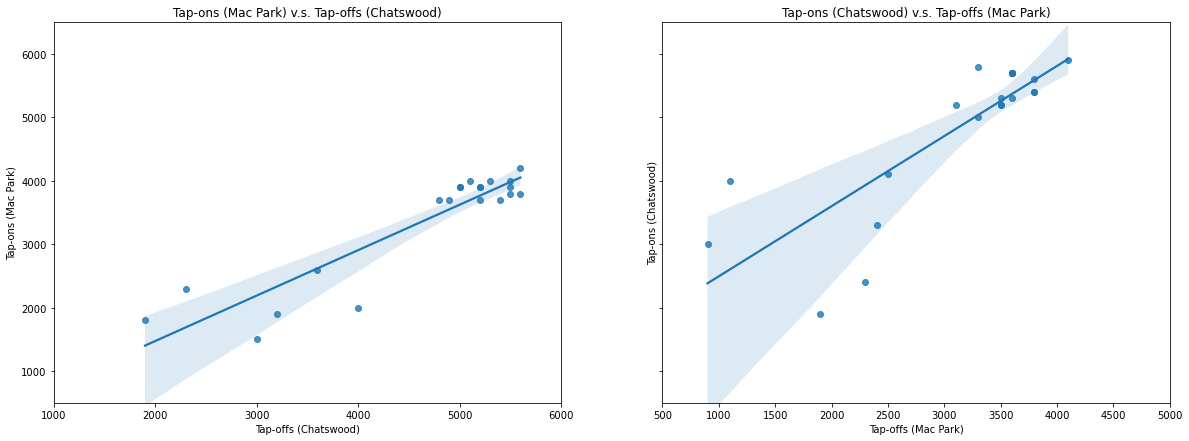

In [12]:
# create subplots for the regression plotting

# independent value: Tap-offs of Chatswood; dependent value: Tap-ons of Macquarie Park
fig, axes = plt.subplots(figsize = (20,7), ncols=2, sharey= True)
plot_a = sns.regplot(x= "Tap-offs (Chatswood)", y= "Tap-ons (Mac Park)", data= mac_chats_taps, ax=axes[0])
plot_a.set_title("Tap-ons (Mac Park) v.s. Tap-offs (Chatswood)")
plot_a.set(xlim=(1000, 6000))
plot_a.set(ylim=(500, 6500))

# independent value: Tap-offs of Macquarie Park; dependent value: Tap-ons of Chatswood
plot_b = sns.regplot(x= "Tap-offs (Mac Park)", y= "Tap-ons (Chatswood)", data= chats_mac_taps, ax=axes[1])
plot_b.set_title("Tap-ons (Chatswood) v.s. Tap-offs (Mac Park)")
plot_b.set(xlim=(500, 5000))
plot_b.set(ylim=(500, 6500))

* Interpretation: From the two plots above, we observe that the distance from each point to the regressive line of the first plot is closer compared to the second plot. Thus, **we will build the linear regression model for the first plot (i.e. Predict the tap-on events in Macquarie Park based on the tap-off events in Chatswood)**.

**Second Group (Strathfield v.s. Parramatta):**

[(500.0, 12000.0)]

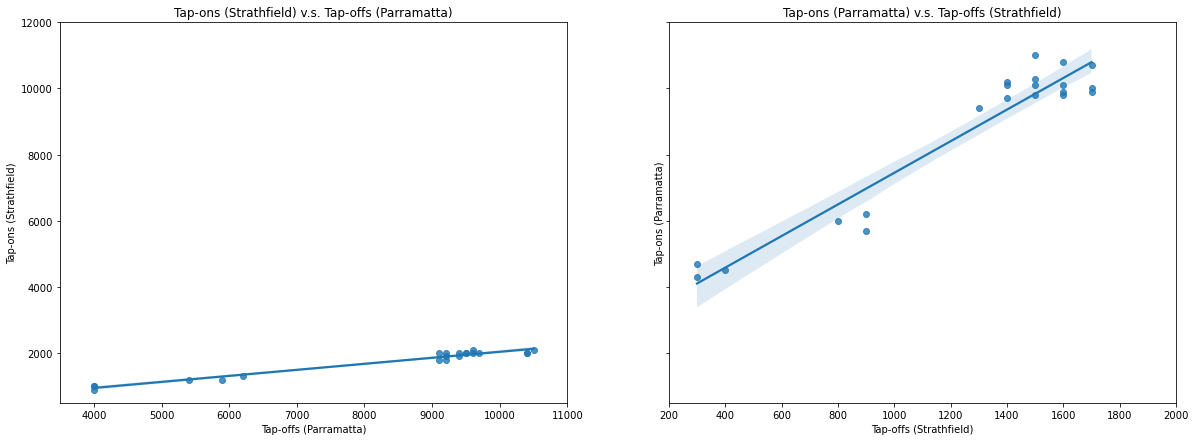

In [13]:
# create subplots for the regression plotting

# independent value: Tap-offs of Parramatta; dependent value: Tap-ons of Strathfield.
fig, axes = plt.subplots(figsize = (20,7), ncols=2, sharey=True)
plot_c = sns.regplot(x= "Tap-offs (Parramatta)", y= "Tap-ons (Strathfield)", data= strath_parra_taps, ax=axes[0])
plot_c.set_title("Tap-ons (Strathfield) v.s. Tap-offs (Parramatta)")
plot_c.set(xlim=(3500, 11000))
plot_c.set(ylim=(500, 12000))

# independent value: Tap-offs of Strathfield; dependent value: Tap-ons of Parramatta.
plot_d = sns.regplot(x= "Tap-offs (Strathfield)", y= "Tap-ons (Parramatta)", data= parra_strath_taps, ax=axes[1])
plot_d.set_title("Tap-ons (Parramatta) v.s. Tap-offs (Strathfield)")
plot_d.set(xlim=(200, 2000))
plot_d.set(ylim=(500, 12000))

* Interpretation: From the two plots above, we observe that the distance from each point to the regressive line of the first plot is closer compared to the second plot. Thus, **we will build the linear regression model for the first plot (i.e. Predict the tap-on events in Strathfield based on the tap-off events in Parramatta)**.

## Model Building

We build the linear regression model for the two groups we presented previously. Let X (independent variable) be the tap-off events, and y (dependent variable) be the tap-on events.

### Model for First Group(Macquarie Park v.s. Chatswood):

We predict the tap-on events in Macquarie Park based on the Tap-off events in Chatswood.

**Create the linear model**

In [14]:
first_reg = linear_model.LinearRegression()

**Split into train and test datasets, and fit data into the model**

In [15]:
# split the dataframe into train (80%) and test (20%) with random state = 142
first_train, first_test= train_test_split(mac_chats_taps, test_size=0.2, random_state=142)
print("train size:", first_train.shape)
print("test size:", first_test.shape)

train size: (16, 2)
test size: (5, 2)


In [16]:
# fit the data in train into the regression model
first_X_train = first_train[['Tap-offs (Chatswood)']]
first_y_train = first_train['Tap-ons (Mac Park)']

first_reg.fit(first_X_train, first_y_train)

LinearRegression()

In [17]:
# assign the variables of testing dataset
first_X_test = first_test[['Tap-offs (Chatswood)']]
first_y_test = first_test['Tap-ons (Mac Park)']

**Predict tap-on events based on tap-off events**

In [18]:
# do prediction on the train set
first_train_preds = first_reg.predict(first_X_train)
print("The predicted tap-on events on train set are:", first_train_preds)

# do prediction on the test set
first_test_preds = first_reg.predict(first_X_test)
print("The predicted tap-on events on test set are:", first_test_preds)

The predicted tap-on events on train set are: [3755.58732132 3755.58732132 3978.99316346 3978.99316346 3606.65009323
 3755.58732132 3681.11870727 3606.65009323 4053.4617775  2564.08949658
 3904.52454941 4053.4617775  3830.05593536 2117.27781231 2861.96395277
 1595.99751398]
The predicted tap-on events on test set are: [3978.99316346 3457.71286513 3532.18147918 2266.2150404  1298.1230578 ]


**Evaluation**

We apply mean square error (MSE) and $R^2$ to check if the model fits well (i.e. whether the predicted tap-on events is slightly diffferent from the actual tap-on events in Macquarie Park).

In [19]:
print("\nThe test set's MSE is:",mean_squared_error(first_y_test, first_test_preds))
print("The test set's root MSE is:", np.sqrt(mean_squared_error(first_y_test, first_test_preds)))
print("The test set's R squared score is:",r2_score(first_y_test, first_test_preds))


The test set's MSE is: 94660.26395187716
The test set's root MSE is: 307.66908189136774
The test set's R squared score is: 0.8977309162144802


* **_Interpretation:_** The $R^2$ of the testing dataset is roughly 0.898, which the test dataset fits the model quite well. However, the MSE value corresponds to a prediction error of roughly 308 tap-ons at all the transport stops of Macquarie Park, which is approximately 9% of the actual mean value of the tap-off events. Therefore this model might be considered as a quite good model.

### Model for Second Group (Strathfield v.s. Parramatta):

We repeat the same steps as the first group to build the linear model. We predict the tap-on events in Strathfield based on the tap-off events in Parramatta.

**Create the linear model**

In [20]:
second_reg = linear_model.LinearRegression()

**Split into train and test datasets, and fit data into the model**

In [21]:
# split the dataframe into train (80%) and test (20%) with random state = 142
second_train, second_test= train_test_split(strath_parra_taps, test_size=0.2, random_state=142)
print("train size:", second_train.shape)
print("test size:", second_test.shape)

train size: (16, 2)
test size: (5, 2)


In [22]:
# fit the data in train into the regression model
second_X_train = second_train[['Tap-offs (Parramatta)']]
second_y_train = second_train['Tap-ons (Strathfield)']

second_reg.fit(second_X_train, second_y_train)

LinearRegression()

In [23]:
# assign the variables of testing dataset
second_X_test = second_test[['Tap-offs (Parramatta)']]
second_y_test = second_test['Tap-ons (Strathfield)']

**Predict tap-on events based on tap-off events**

In [24]:
# do prediction on the train set
second_train_preds = second_reg.predict(second_X_train)
print("The predicted tap-on events on train set are:", second_train_preds)

# do prediction on the test set
second_test_preds = second_reg.predict(second_X_test)
print("The predicted tap-on events on test set are:", second_test_preds)

The predicted tap-on events on train set are: [1948.83611266 1968.26638659 2007.12693445 1968.26638659 1987.69666052
 1948.83611266 1987.69666052 1909.9755648  1890.54529086 1327.06734685
 1909.9755648  2162.56912591 2143.13885197  899.60132036 1268.77652506
 1171.6251554 ]
The predicted tap-on events on test set are: [2143.13885197 1890.54529086 1909.9755648   899.60132036  899.60132036]


**Evaluation**

We apply mean square error (MSE) and $R^2$ to check if the model fits well (i.e. whether the predicted tap-on events is slightly diffferent from the actual tap-on events in Strathfield).

In [25]:
print("\nThe test set's MSE is:",mean_squared_error(second_y_test, second_test_preds))
print("The test set's root MSE is:", np.sqrt(mean_squared_error(second_y_test, second_test_preds)))
print("The test set's R squared score is:",r2_score(second_y_test, second_test_preds))


The test set's MSE is: 9789.29645655884
The test set's root MSE is: 98.94087353848681
The test set's R squared score is: 0.9506587880213768


* **_Interpretation:_** The $R^2$ of the testing dataset is significantly high, which is roughly 0.951. this means the test dataset fits the model well. The MSE value corresponds to a prediction error of roughly 99 tap-ons at all the transport stops of Strathfield, which is approximately 6% of the actual mean value of the tap-off events. Therefore this model might be considered as a good model.

## Conclusion

There could be many factors that can affect on the datasets. For example, there is train service in Chatswood while there is only bus and metro services in Macquarie Park. Another example is that there is no ferry service in Strathfield while the tap-offs in Parramatta includes passengers of Parramatta Wharf. 

We have built two of the linear regression models to analyse the relationship between the tap-ons at all the transport stops in one suburb and the tap-offs at all the transport stops in another suburbs. We build one model for the relationship between the tap-ons in Macquarie Park and the tap-offs in Chatswood, and another model for the relationship between the tap-ons in Strathfield and the tap-offs in Parramatta.

From the two models, we can clearly notice that the model for Strathfield and Parramatta is better than the model for Macquarie Park and Chatswood. In fact, the $R^2$ of the former model is up to 0.951 compared to 0.898 of the later model. Moreover, the percentage of root mean squared error comapred to the actual mean value of the "Strathfield v.s. Parramatta" model is considerably lower than the "Macquarie Park v.s. Chatswood" model, which is 6% and 9% to the actual mean values respectively. 

Thus, we can conclude that the prediction for the tap-on rate in Parramatta is more precise compare to the prediction for Macquarie Park. Based on this model, we then can predict the traveling trend from the two nearby suburbs and give recommendation for passengers to plan ahead, especially traveling under the Covid-19 circumstance around the key commercial cities (e.g. Parramatta).

# Prediction of Transport Uses Based on Personal Weekly Income

## Data Summary and Manipulation


We use the dataset about the total number of traveling methods to work of each personal income group in New South Wales taken from [the TableBuilder of the Australian Bureau of Statistics (ABS)](https://guest.censusdata.abs.gov.au/webapi/jsf/login.xhtml). The census of Australian was conducted in 2016, and the dataset was created and filtered from the census surveys of persons in usual residence areas acros the state New South Wales, Australia. The file was saved in the Excel file `.xlsx`, and the file's name is `transportmodevsIncome.xlsx`. This file includes the group of people based on their weekly income (with annual income in the round bracket), and the relevant number of transport uses corresponding to each group (in New South Wales).

*_Process:_*
- Data summary and manipulation: Clean the dataset (transpose column to row, remove logo, title of organisation, etc.), group the income into low income (class 0) which is less than 1000 AUD weekly, and middle-high income (class 1) which is higher than 1000 AUD weekly.
- Data exploration: Plot to compare the uses of transport in each income group, then come up with the idea whether it is obvious that the uses of transport would correlate with low or high income group.
- Model building: Build Logistic Regression, KNN, GaussianNB, and MLPClassifier models, then compare to choose the best learning results.

*_Aim:_*
To study if any of the uses of transport modes could be used to predict the group of income (of an employee), and whether people with higher income prefer traveling to work, for example, by train than bus, or vice versa.

*_Goal:_*
You then need to follow the procedure outlined for generating a train/test set, building and evaluating a model. My goal is to build the best model possible over this data. The first step should be to build a logistic regression model using all of the features that are available such as train, bus, ferry, tram.

### Import File and Create a Dataframe

As the dataset was taken from the TableBuilder of the ABS, we have to modify the Excel file which has been read in order to convert it into an "analysable" format of dataframe.

In [26]:
# Import the Excel file taken from ABS and convert into the dataframe, skip the
# first eight rows which are the logo and the titles/names of the organisations
df_raw = pd.read_excel("File/transportmodevsIncome.xlsx", skiprows= 8, index_col =0)

# Set the first row of the dataframe so far as the column names
df_raw.columns = df_raw.iloc[0]

# Remove the first two rows after setting it as column names (second row is NaN
# and an header description which does not help in the exploration of the dataset)
df_raw = df_raw.iloc[2:]

# remove several last rows which are copyright, logo and cite of sources
df_raw = df_raw[:5]

# transpose columns and rows
df_raw = df_raw.T

# remove several last rows which are NaN
income_tol = df_raw[16:17] # the index "Total"
df_income = df_raw[:16] # not include index "Total"

# Rename the column
income_tol.columns = ["Train", "Bus", "Ferry", "Tram", "Total"]
df_income.columns = ["Train", "Bus", "Ferry", "Tram", "Total"]

# remove the first row (contain transport title and NaN value)
df_income = df_income.iloc[1:]

# final dataframe
df_income

,Train,Bus,Ferry,Tram,Total
INCP Total Personal Income (weekly),,,,,
Nil income,1070,547,27,7,1650
Negative income,350,147,22,10,530
"$1-$149 ($1-$7,799)",6028,5454,53,54,11586
"$150-$299 ($7,800-$15,599)",10481,5894,87,59,16526
"$300-$399 ($15,600-$20,799)",13629,6233,84,85,20030
"$400-$499 ($20,800-$25,999)",16279,7257,121,106,23755
"$500-$649 ($26,000-$33,799)",22640,9652,202,194,32679
"$650-$799 ($33,800-$41,599)",31266,11515,275,206,43265
"$800-$999 ($41,600-$51,999)",41359,13722,435,306,55825


### Group Income into Class

In [27]:
# adding classes for data based on the amount of personal income
idx = 5
new_col = [0,0,0,0,0,0,0,0,0,1,1,1,1,1,1]
df_income.insert(loc=idx, column="Class", value=new_col)
df_income

,Train,Bus,Ferry,Tram,Total,Class
INCP Total Personal Income (weekly),,,,,,
Nil income,1070,547,27,7,1650,0
Negative income,350,147,22,10,530,0
"$1-$149 ($1-$7,799)",6028,5454,53,54,11586,0
"$150-$299 ($7,800-$15,599)",10481,5894,87,59,16526,0
"$300-$399 ($15,600-$20,799)",13629,6233,84,85,20030,0
"$400-$499 ($20,800-$25,999)",16279,7257,121,106,23755,0
"$500-$649 ($26,000-$33,799)",22640,9652,202,194,32679,0
"$650-$799 ($33,800-$41,599)",31266,11515,275,206,43265,0
"$800-$999 ($41,600-$51,999)",41359,13722,435,306,55825,0


### Data Summary

In [28]:
# check the size of dataframe
df_income.shape

(15, 6)

In [29]:
# summarise the dataframe
def sum(df):
    print("\nmean value:",df.mean())
    print("\nmin value:", df.min())
    print("\nmax value:", df.max())
    print("\nsum value:", df.sum())
    
print("Summary of the dataset")
sum(df_income)

Summary of the dataset

mean value: Train    24954.466667
Bus       9762.800000
Ferry      633.533333
Tram       224.066667
Total    35573.933333
Class        0.400000
dtype: float64

min value: Train    350
Bus      147
Ferry     22
Tram       7
Total    530
Class      0
dtype: object

max value: Train    50401
Bus      19397
Ferry     3439
Tram       550
Total    72282
Class        1
dtype: object

sum value: Train    374317
Bus      146442
Ferry      9503
Tram       3361
Total    533609
Class         6
dtype: object


In [30]:
# count the number of records in each class
df_income.Class.value_counts()

0    9
1    6
Name: Class, dtype: int64

* ***Comment:*** There are more records for people who have low income than people who have high income.

## Data Exploration

Firstly we will plot the total number of each transport usage.

<AxesSubplot:>

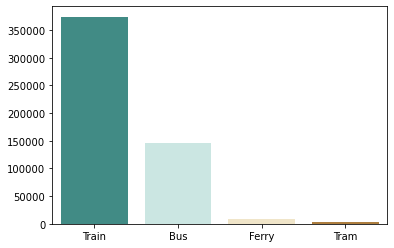

In [31]:
tol_plot = income_tol.drop(["Total"], axis=1)
sns.barplot(data= tol_plot, palette= "BrBG_r")

* ***Interpretation:*** Train service has the largest number of passengers across all income groups which is over 350000 in total.

We also plot to see the number of each transport uses spreading across all the income groups.

In [32]:
temp = df_income.drop(["Class", "Total"], axis=1)
temp["Income Groups"] = temp.index
melted = pd.melt(temp, id_vars = "Income Groups", var_name="Transport Types")

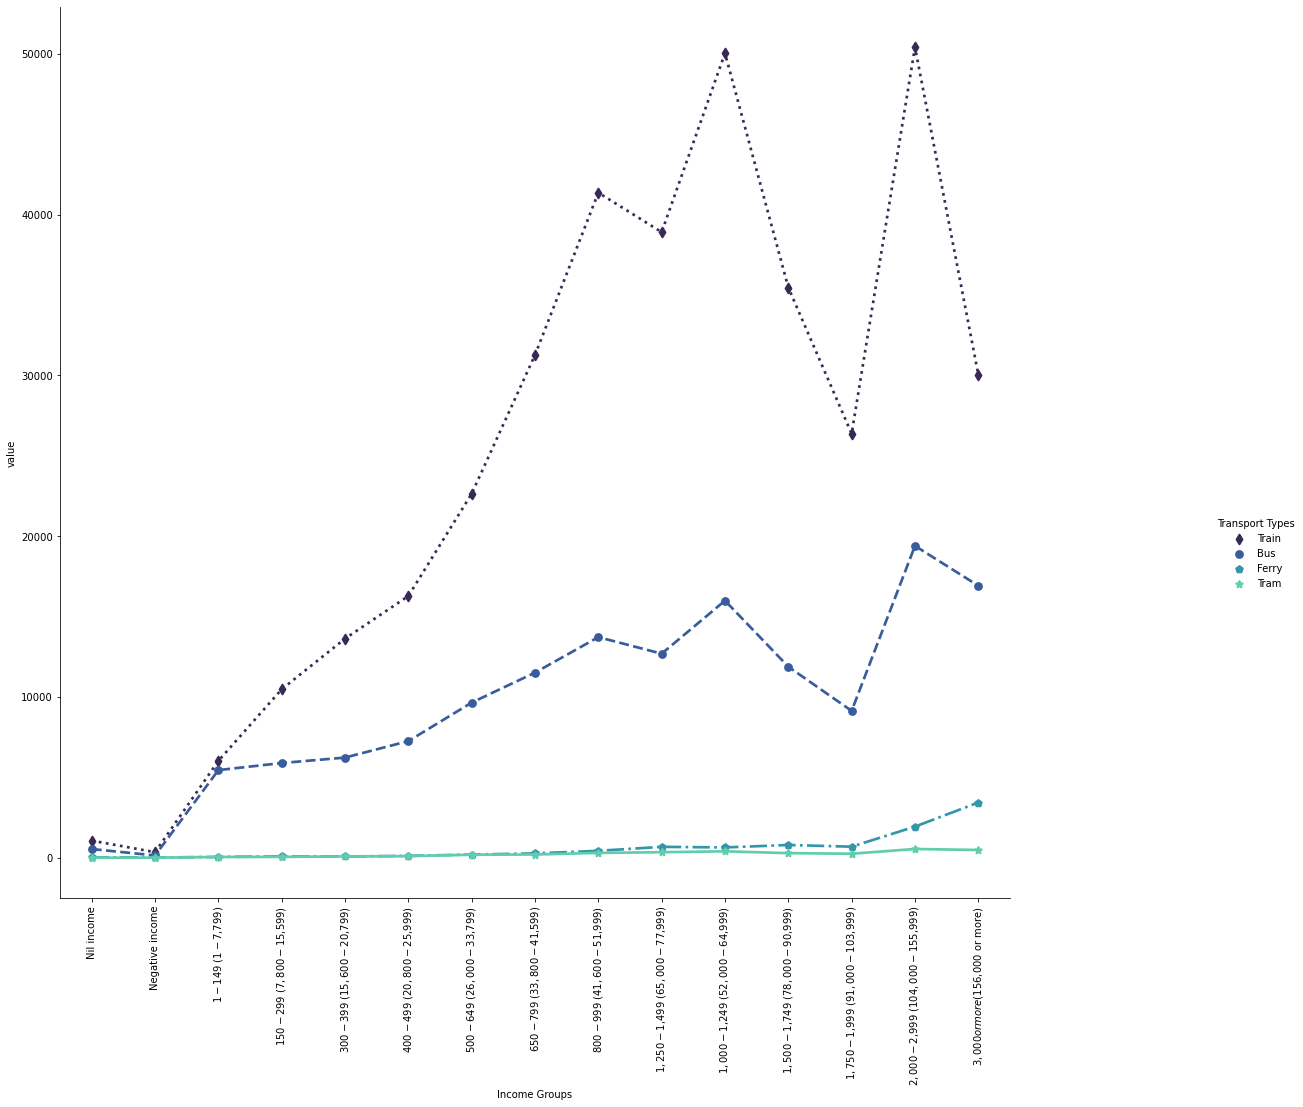

In [33]:
sns_plot = sns.catplot(x="Income Groups", y="value", markers=["d", "o", "p", "*"], 
                       linestyles=["dotted", "dashed", "dashdot", "solid"],
                       kind="point", hue= "Transport Types", data= melted,
                       palette = "mako")
sns_plot.fig.set_size_inches(20,14)
sns_plot.set_xticklabels(rotation = 90)

* ***Interpretation:*** overall, the number of service uses increases when the income increases.
    * Train service: Two high income groups 1,000− 1,249 (52,000−64,999) and 2,000− 2,999 (104,000−155,999) reach over 50000 passengers. However, the high income group 1,750− 1,999 (91,000−103,999) only has around 25000-26000 passengers.
    * Bus service: The high income group 2,000− 2,999 (104,000−155,999) nearly reach 20000 uses. Similar to the train service, the high income group 1,750− 1,999 (91,000−103,999) has a low uses of bus service where it is around 9000 uses.
    * Ferry and Tram services: The uses of services do not increase significantly but it is obvious to see that these two services peak when the income rate reaches $2000-3000.

Then we plot to see how the number of all-transport-mode uses in each income groups varies. Note that we have grouped those incomes group into two classes: 0 for low income and 1 for middle-high income.

<AxesSubplot:xlabel='Class', ylabel='Total'>

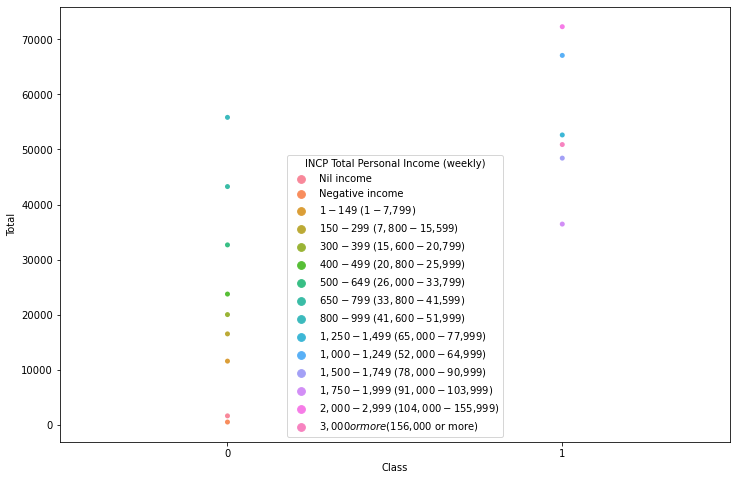

In [34]:
plt.figure(figsize=(12,8))
sns.swarmplot(x='Class', y='Total', data= df_income, hue= df_income.index)

* ***Interpretation:*** We could see almost all high income groups use more transport services than the low income groups. Particularly, only two low income groups which have more than 40000 uses of transport in total are `800-999 (41,600-51,999)` and `650-799 (33,800-41,599)`; these two groups nearly reach 1000 weekly income which would be listed into high income class. By contrast, only people who earn `1,750-1,999 (91,000-103,999)` has lower than 40000 uses of transport totally.

We also will plot to see the uses of each transport mode in percentage then compare between each income groups.

In [35]:
df_income["TRAIN"] = (df_income.Train*100)/df_income.Total
df_income["BUS"] = (df_income.Bus*100)/df_income.Total
df_income["FERRY"] = (df_income.Ferry*100)/df_income.Total
df_income["TRAM"] = (df_income.Tram*100)/df_income.Total

<AxesSubplot:title={'center':'Percentage of Transport Uses'}, ylabel='Income Groups'>

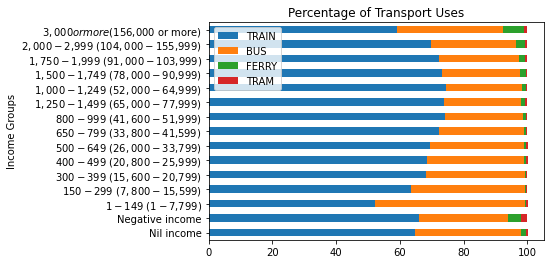

In [36]:
df = df_income.drop(["Train", "Bus", "Ferry", "Tram", "Total", "Class"], axis=1)
df['Income Groups'] = df.index
df.plot(x = "Income Groups", kind = 'barh', stacked = True, title = 'Percentage of Transport Uses')

* ***Interpretation:*** train is the most popular transport service for all income groups. However, as the income increases the percentage for train also increases. The similar trend could be seen in ferry and tram where almost the percentage increases when the income is higher. Thus, this trend indicates that people with higher income tend to travel by train, ferry and tram. On the other hands, the percentage of the use of bus accounts for larger proportion in low income groups compared to the high income ones, which means people with low income tend to travel by bus. Thus, we could use these four features to build a model which is to predict the income class (0 and 1).

In [37]:
df_income.drop(["TRAIN", "BUS", "FERRY", "TRAM"], axis= 1, inplace = True)

## Model Building

In [38]:
set(df_income['Class'])

{0, 1}

There are two classes: 0 and 1 
* 0 is stand for the low income earner 
* 1 represented for the high income earner

### Logistic Regression

**Train and Test Sets Splitting**

In [39]:
# Split the data into training (50%) and testing data (50%) and use random_state is 7
train,test = train_test_split(df_income, test_size=0.5, random_state=7)
print(train.shape)
print(test.shape)

(7, 6)
(8, 6)


In [40]:
# Getting input data and targets for building prediction model:
X_train = train.drop(['Total', 'Class'], axis = 1)
y_train = train['Class']
X_test = test.drop(['Total', 'Class'], axis = 1)
y_test = test['Class']

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
print(X_train.head(2))
print(y_train.head(2))

X_train shape: (7, 4)
y_train shape: (7,)
X_test shape: (8, 4)
y_test shape: (8,)
                                     Train    Bus Ferry Tram
INCP Total Personal Income (weekly)                         
$2,000-$2,999 ($104,000-$155,999)    50401  19397  1940  550
$650-$799 ($33,800-$41,599)          31266  11515   275  206
INCP Total Personal Income (weekly)
$2,000-$2,999 ($104,000-$155,999)    1
$650-$799 ($33,800-$41,599)          0
Name: Class, dtype: int64


In [41]:
# Training Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [42]:
# Do predictions on test set
y_pred_train= model.predict(X_train)
y_pred_test= model.predict(X_test)
print(y_pred_train)
print(y_pred_test)

[1 0 1 0 0 1 0]
[1 0 1 0 1 0 1 1]


In [43]:
# Evaluate the performance of your trained model
print("Accuracy score on training test:", accuracy_score(y_train,y_pred_train))
print("Accuracy score on testing test:", accuracy_score(y_test,y_pred_test))

Accuracy score on training test: 1.0
Accuracy score on testing test: 0.75


In [44]:
# list of accuracy score of test set
test_scores = []
test_scores.append(accuracy_score(y_test,y_pred_test))

* ***Comment:*** The accuracy score is 0.75 which indicates the model was built quite well. However, since the dataset is small, therefore the training accuracy score is upto 1.0, this model might probably be overfitting.

In [45]:
# Checking confusion metric 
print ("Confusion matrix on test set:")
print(confusion_matrix(y_test,y_pred_test))

Confusion matrix on test set:
[[3 2]
 [0 3]]


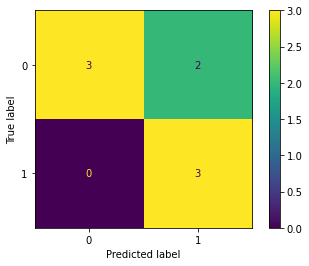

In [46]:
plot_confusion_matrix(model, X_test, y_test)

* ***Comment:*** There are two false predictions of class 1 (high income) where they are actually class 0 (low income). Therefore, this model might predict incorrectly the low income group based on the number of transport uses.

In [47]:
acc_scores = []
for i in range(1,5):
    clf = LogisticRegression(max_iter=1000)
    rfe = RFE(estimator =clf, n_features_to_select=i)
    #training model
    rfe.fit(X_train, y_train)
    #predicting on test set 
    y_pred = rfe.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)
    # print this
    print ("Acc on test set using", i, "feature: ", acc_score)
    print ("Feature which have been chosen:", X_train.columns[rfe.support_])
    print("")
    # append to the list 
    acc_scores.append(acc_score)

Acc on test set using 1 feature:  1.0
Feature which have been chosen: Index(['Ferry'], dtype='object')

Acc on test set using 2 feature:  1.0
Feature which have been chosen: Index(['Ferry', 'Tram'], dtype='object')

Acc on test set using 3 feature:  0.625
Feature which have been chosen: Index(['Bus', 'Ferry', 'Tram'], dtype='object')

Acc on test set using 4 feature:  0.75
Feature which have been chosen: Index(['Train', 'Bus', 'Ferry', 'Tram'], dtype='object')



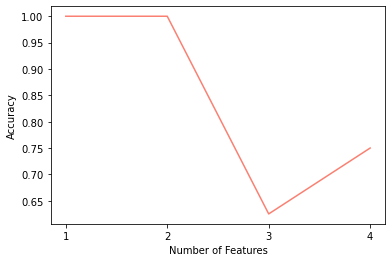

In [48]:
# Plotting the accuracy number
plotting = plt.plot(range(1, X_train.shape[1]+1), acc_scores, color= "salmon")
plt.xlabel("Number of Features")
plt.ylabel("Accuracy")
plt.xticks(np.arange(1, 5 , step=1))
plt.show()

* ***Comment:*** By using RFE it is obvious that the number of ferry and tram uses could be used to predict the income group precisely. However, by adding bus and train into the model, its accuracy score drops to 0.75, which is also quite good. To not build an overfitting model, we will choose the four features model instead of the one or two features.

**Cross Validation Testing**

In [49]:
X= df_income.drop(["Total", "Class"], axis= 1)
y= df_income["Class"]

In [50]:
lr = LogisticRegression(max_iter=1000)
scores = cross_val_score(lr, X, y, scoring='accuracy', cv=5)
print('Accuracy range for Logistic Regression: [%.4f, %.4f]; mean: %.4f; std: %.4f\n'
      % (scores.min(), scores.max(), scores.mean(), scores.std()))
test_scores.append(scores.mean())

Accuracy range for Logistic Regression: [0.3333, 1.0000]; mean: 0.8000; std: 0.2667



* **Comment:** The average accuracy score when using cross validation is 0.8 including all four types of transport, which is higher than using train test splitting.

### K-Nearest Neighbours Classifier

**Train and Test Sets Splitting**

In [51]:
# choosing the nearest 3 neighbours
clf_knn = KNeighborsClassifier(n_neighbors=3)
clf_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [52]:
# do prediction
train_pred = clf_knn.predict(X_train)
test_pred = clf_knn.predict(X_test)

In [53]:
print("Accuracy of the train set:", accuracy_score(y_train, train_pred))
print("Accuracy of the test set:", accuracy_score(y_test, test_pred))
test_scores.append(accuracy_score(y_test, test_pred))

Accuracy of the train set: 0.8571428571428571
Accuracy of the test set: 0.75


* ***Comment:*** The accuracy of the test set is similar to the logistic regression model while the accuracy of train set is lower.

**Cross Validation Testing**

In [54]:
knn = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(knn, X, y, scoring='accuracy', cv=5)
print('Accuracy range for K-Nearest Neighbours: [%.4f, %.4f]; mean: %.4f; std: %.4f\n'
      % (scores.min(), scores.max(), scores.mean(), scores.std()))
test_scores.append(scores.mean())

Accuracy range for K-Nearest Neighbours: [0.6667, 1.0000]; mean: 0.7333; std: 0.1333



In [55]:
test_scores

[0.75, 0.8, 0.75, 0.7333333333333332]

### Gaussian Naive Bayes

**Train and Test Sets Splitting**

In [56]:
# train the model
clf_gnb = GaussianNB()
clf_gnb.fit(X_train, y_train)

GaussianNB()

In [57]:
# do prediction
train_pred = clf_gnb.predict(X_train)
test_pred = clf_gnb.predict(X_test)

In [58]:
print("Accuracy of the train set:", accuracy_score(y_train, train_pred))
print("Accuracy of the test set:", accuracy_score(y_test, test_pred))
test_scores.append(accuracy_score(y_test, test_pred))

Accuracy of the train set: 1.0
Accuracy of the test set: 0.875


* ***Comment:*** The accuracy of the test set is higher than the logistic regression model and the KNN model, which gives more precise prediction. However, the accuracy of the train set is 1, which might cause overfitting for the model.

**Cross Validation Testing**

In [59]:
gnb = GaussianNB()
scores = cross_val_score(gnb, X, y, scoring='accuracy', cv=5)
print('Accuracy range for Gaussian Naive Bayes: [%.4f, %.4f]; mean: %.4f; std: %.4f\n'
      % (scores.min(), scores.max(), scores.mean(), scores.std()))
test_scores.append(scores.mean())

Accuracy range for Gaussian Naive Bayes: [0.3333, 1.0000]; mean: 0.8667; std: 0.2667



* ***Comment:*** The mean accuracy score is higher than the logistic regression model we built previously using cross validation and the KNN model.

### Multi-layer Perceptron

**Train and Test Sets Splitting**

In [60]:
# train the model
clf_nn = MLPClassifier(max_iter=800,solver="lbfgs",activation="tanh",random_state=42)
clf_nn.fit(X_train, y_train)

MLPClassifier(activation='tanh', max_iter=800, random_state=42, solver='lbfgs')

In [61]:
# do prediction
train_pred = clf_nn.predict(X_train)
test_pred = clf_nn.predict(X_test)

In [62]:
print("Accuracy of the train set:", accuracy_score(y_train, train_pred))
print("Accuracy of the test set:", accuracy_score(y_test, test_pred))
test_scores.append(accuracy_score(y_test, test_pred))

Accuracy of the train set: 1.0
Accuracy of the test set: 0.75


* ***Comment:*** The accuracy of the test set is similar to the logistic regression model and the KNN model but lower than the GNB model.

**Cross Validation Testing**

In [63]:
nn =  MLPClassifier(max_iter=800, solver="lbfgs",activation="tanh",random_state=42)
scores = cross_val_score(nn, X, y, scoring='accuracy', cv=5)
print('Accuracy range for Gaussian Naive Bayes: [%.4f, %.4f]; mean: %.4f; std: %.4f\n'
      % (scores.min(), scores.max(), scores.mean(), scores.std()))
test_scores.append(scores.mean())

Accuracy range for Gaussian Naive Bayes: [0.0000, 1.0000]; mean: 0.6000; std: 0.3266



* ***Comment:*** The mean accuracy is significant lower than the three previous models.

### Choosing the Best Model for the Dataset

In [64]:
# dataframe of accuracy scores
models = ["LR_Split", "LR_CV", "KNN_Split", "KNN_CV", "GNB_Split",
         "GNB_CV", "MLP_Split", "MLP_CV"]
df_acc = pd.DataFrame(models, columns=["Model Type"])
df_acc["Accuracy"] = test_scores
df_acc.head(2)

,Model Type,Accuracy
0,LR_Split,0.75
1,LR_CV,0.80


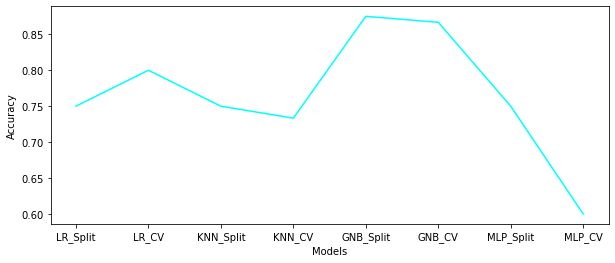

In [65]:
# Plotting the accuracy number
plt.figure (figsize = (10,4))
plt.plot(df_acc["Model Type"], df_acc["Accuracy"], color= "aqua")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.show()

* ***Interpretation:*** We could see the Gaussian Naive Bayes model when using train test splitting is the most accurate prediction within all the models he have built so far, which the accuracy score reaches around 0.87. The second highest accuracy score model (0.85 of the accuracy score) is also the Gaussian Naive Bayes model which uses the cross validation method to test the dataset. Therefore, we could predict the income group based on the uses of transport service via the Gaussian Naive Bayes model.

## Conclusion

Since the dataset was retrieved from the ABS government website, there were several copyright logo, descriptions and titles, etc. which will affect significantly on the dataframe we tried to convert into. Therefore, the dataset cleaning process would be to remove all the unnecessary text and logo. Also, we switched the columns and rows to analyse the dataset easier. Moreover, since our goal is to predict the income groups based on the uses of transport services, we group the income group into two major classes -- 0 for low income group, and 1 for middle-high income group -- instead of having 15 income groups. Therefore, we could do the prediction more effective.

We explore the relationship between age groups and the transport uses by plotting group to observe the trends. We also notice that the train service accounts for the majority of transport uses across all age groups.

Finally, we built four different models including Logistic Regression, K-nearest Neighbors, Gaussian Naive Bayes and Multi-layer Perceptron to predict the income groups based on transport usage. After all we observe that the model built by the Gaussian Naive Bayes method has the highest accuracy score which its average accuracy is 0.87 (or 0.85 depended on how we build the train and test sets) in all four models. Thus, we could use the Gaussian Naive Bayes model to do the prediction on income groups to have the most accurate results.

# Prediction of Transport Uses Based on Age Group

## Data Summary and Manipulation 


We utilise the dataset about the total number of specified transportations to work by age in ten year groups in New South Wales taken from [the TableBuilder of the Australian Bureau of Statistics (ABS)](https://guest.censusdata.abs.gov.au/webapi/jsf/login.xhtml). The census of Australian was conducted in 2016, and the dataset was created and filtered from the census surveys of persons in usual residence areas acros the state New South Wales, Australia. The file was saved in the Excel file `.xlsx`, and the file's name is `transportmodevsAge.xlsx`. This file includes the group of people based on age in ten year groups, and the relevant number of transport uses corresponding to each age group (in New South Wales).

*_Process:_*
- Data summary and manipulation: Clean the dataset (transpose column to row, remove logo, title of organisation, etc.). Group the records into two major groups: under 60 (youth + workforce) years as class 0, over 60 (retiree) years as class 1.
- Data exploration: Plot to compare the uses of transport in each broader age group to determine where there is a relationship between the uses of transport and age groups.
- Model building: we conduct Logistic Regression, KNN, GaussianNB, and MLPClassifier models, then decide the best learning results.

*_Aim:_*
To study if any of the predefined transport modes could predict a specific age group, or whether the working force choose train as the most convenient method of transport.

*_Goal:_*
You then need to follow the procedure outlined for generating a train/test set, building and evaluating a model. My goal is to build the best model possible over this dataset. The first step should be to build a logistic regression model using all of the features that are available such as train, bus, ferry, tram.

### Import File and Create Dataframe

As the dataset was taken from the TableBuilder of the ABS, we have to modify the Excel file which has been read in order to convert it into an "analysable" format in Notebook environment.

In [66]:
# Import the Excel file taken from ABS and convert into the dataframe, skip the
# first eight rows which are the logo and the titles/names of the organisations
df_raw2 = pd.read_excel("File/transportmodevsAge.xlsx", skiprows= 8, index_col =0)

# Set the first row of the dataframe so far as the column names
df_raw2.columns = df_raw2.iloc[0]

# Remove the first two rows after setting it as column names (second row is NaN
# and an header description which does not help in the exploration of the dataset)
df_raw2 = df_raw2.iloc[2:]

# remove several last rows which are copyright, logo and cite of sources
df_raw2 = df_raw2[:5]

# transpose columns and rows
df_raw2 = df_raw2.T

# remove several last rows which are NaN
age_tol = df_raw2[12:13] # the index "Total"
df_age = df_raw2[:12] # not include index "Total"

# Rename the column
age_tol.columns = ["Train", "Bus", "Ferry", "Tram", "Total"]
df_age.columns = ["Train", "Bus", "Ferry", "Tram", "Total"]

# remove the first row (contain transport title and NaN value)
df_age = df_age.iloc[1:]

# final dataframe
df_age

,Train,Bus,Ferry,Tram,Total
AGE10P - Age in Ten Year Groups,,,,,
0-9 years,0,0,0,0,0
10-19 years,10869,8421,69,74,19431
20-29 years,115402,41592,1702,914,159610
30-39 years,114937,40941,3094,1077,160044
40-49 years,69864,28815,2617,722,102016
50-59 years,48007,19717,1522,452,69695
60-69 years,17732,7824,543,159,26257
70-79 years,1781,973,88,13,2855
80-89 years,166,92,4,0,265


### Removing Outliers

It appears that the statistics of the 0-9 and 100 years and over ranges are 0 so we consider them as outliers and remove them from the dataframe so as for better predition models. 

In [67]:
df_age = df_age[1:10]

### Replace the Total Column

Since there are several incorrect values in the "Total" field, we will recalculate this field.

In [68]:
df_age.drop(["Total"], axis=1, inplace=True)

In [69]:
df_age["Total"] = df_age.Train + df_age.Bus + df_age.Ferry + df_age.Tram
df_age

,Train,Bus,Ferry,Tram,Total
AGE10P - Age in Ten Year Groups,,,,,
10-19 years,10869,8421,69,74,19433
20-29 years,115402,41592,1702,914,159610
30-39 years,114937,40941,3094,1077,160049
40-49 years,69864,28815,2617,722,102018
50-59 years,48007,19717,1522,452,69698
60-69 years,17732,7824,543,159,26258
70-79 years,1781,973,88,13,2855
80-89 years,166,92,4,0,262
90-99 years,20,13,0,0,33


### Group Age Ranges into Class

We divide all 11 age ranges into two classes of 0 and 1, in which class 0 represents the youth and working force and class 1 represents the retiree group.

In [70]:
# adding classes for data based on the age groups
idx = 5
new_columns = [0,0,0,0,0,1,1,1,1]
df_age.insert(loc=idx, column="Class", value=new_columns)
df_age

,Train,Bus,Ferry,Tram,Total,Class
AGE10P - Age in Ten Year Groups,,,,,,
10-19 years,10869,8421,69,74,19433,0
20-29 years,115402,41592,1702,914,159610,0
30-39 years,114937,40941,3094,1077,160049,0
40-49 years,69864,28815,2617,722,102018,0
50-59 years,48007,19717,1522,452,69698,0
60-69 years,17732,7824,543,159,26258,1
70-79 years,1781,973,88,13,2855,1
80-89 years,166,92,4,0,262,1
90-99 years,20,13,0,0,33,1


### Data Summary

In [71]:
# check the size of dataframe
df_age.shape

(9, 6)

In [72]:
# summarise the dataframe
def sum(df):
    print("\nmean value:",df.mean())
    print("\nmin value:", df.min())
    print("\nmax value:", df.max())
    print("\nsum value:", df.sum())
    
print("Summary of the dataset")
sum(df_age)

Summary of the dataset

mean value: Train    42086.444444
Bus      16487.555556
Ferry     1071.000000
Tram       379.000000
Total    60024.000000
Class        0.444444
dtype: float64

min value: Train    20
Bus      13
Ferry     0
Tram      0
Total    33
Class     0
dtype: object

max value: Train    115402
Bus       41592
Ferry      3094
Tram       1077
Total    160049
Class         1
dtype: object

sum value: Train    378778
Bus      148388
Ferry      9639
Tram       3411
Total    540216
Class         4
dtype: object


In [73]:
# count the number of records in each class
df_age.Class.value_counts()

0    5
1    4
Name: Class, dtype: int64

* ***Comment:*** The youth and working force group are nearly the same size as the retiree group.

## Data Exploration

Firstly, we plot a histogram of transport uses by each mode.

<AxesSubplot:>

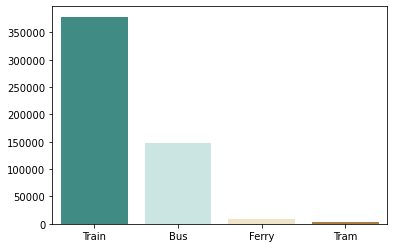

In [74]:
mode_plot = age_tol.drop(["Total"], axis=1)
sns.barplot(data= mode_plot, palette= "BrBG_r")

* ***Interpretation:*** It appears that Train service remains as the transport mode with the highest passengers across all age groups (378778 in total)

We also plot to find out how each age group uses all the transport modes.

In [75]:
agegr = df_age.drop(["Class", "Total"], axis=1)
agegr["Age Groups"] = agegr.index
agegr_melted = pd.melt(agegr, id_vars = "Age Groups", var_name="Transport Types")

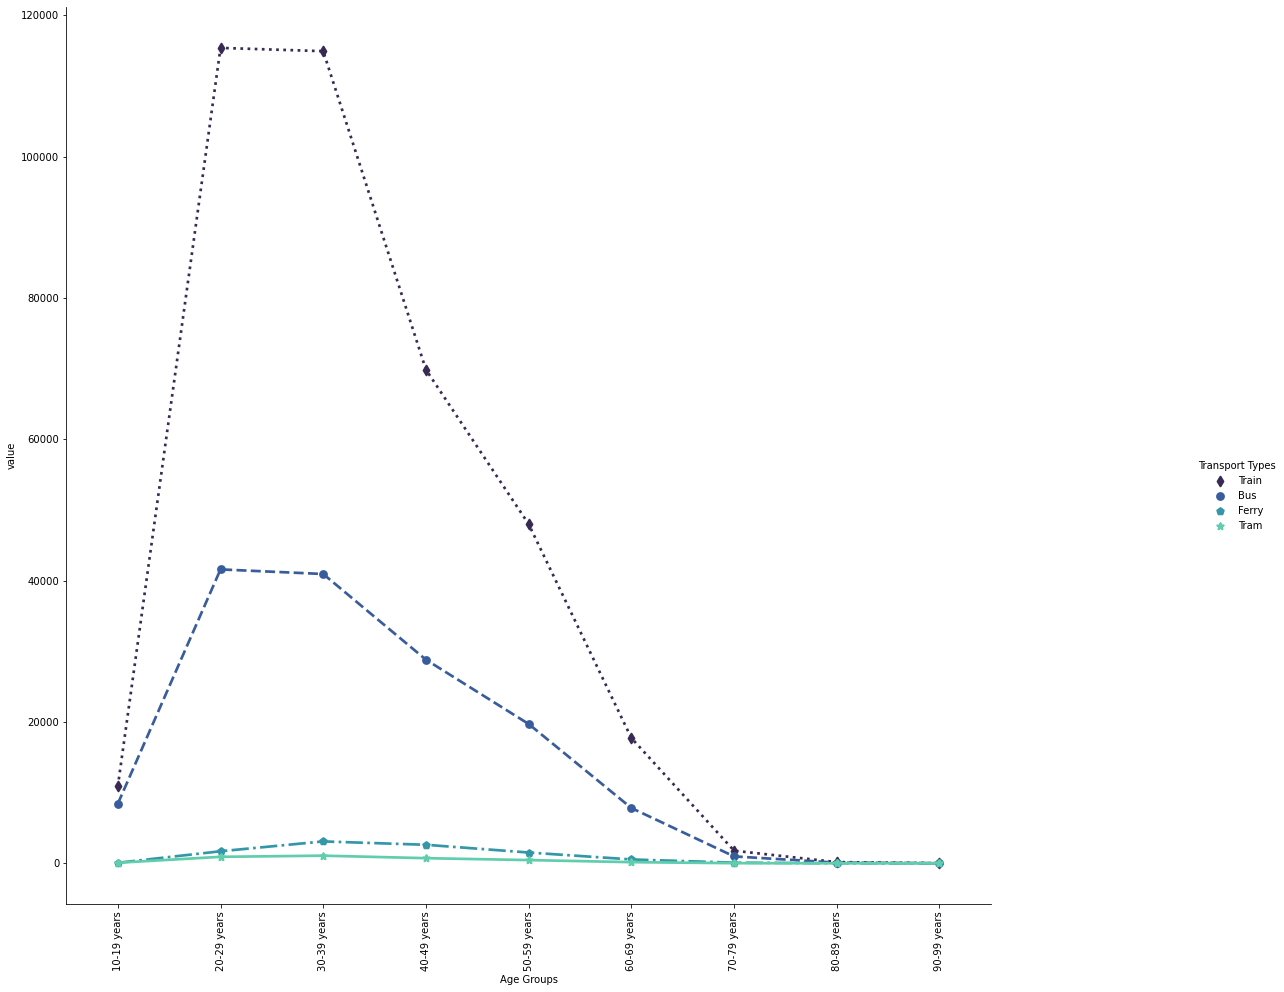

In [76]:
sns_plot = sns.catplot(x="Age Groups", y="value", markers=["d", "o", "p", "*"], 
                       linestyles=["dotted", "dashed", "dashdot", "solid"],
                       kind="point", hue= "Transport Types", data= agegr_melted,
                       palette = "mako")
sns_plot.fig.set_size_inches(20,14)
sns_plot.set_xticklabels(rotation = 90)

* ***Interpretation:*** overall, of all transport methods, the working force is the dominant group with the highest recorded number of travellings. 
   * Train service: Two age ranges 20-19 and 30-29 years reach aroung 115000 travellings while both the youth and retiree group are recorded with under 20000 passengers.
   * Bus service: Two age ranges 20-19 and 30-29 years remain as the groups with the most passengers (more than 40000). Similar to the train service, the retiree group has a lower uses of bus service with specificly 26257 for the 60-69 years range and under 3000 passengers for those aged above 70.
   * Ferry and Tram services: The uses of services just increases slightly and remains stable with two peaks at 30-39 and 40-49 years groups.

We also will plot to see the uses of each transport mode in percentage for each age range.

In [77]:
df_age["TRAIN"] = (df_age.Train*100)/df_age.Total
df_age["BUS"] = (df_age.Bus*100)/df_age.Total
df_age["FERRY"] = (df_age.Ferry*100)/df_age.Total
df_age["TRAM"] = (df_age.Tram*100)/df_age.Total
df_age.head(2)

,Train,Bus,Ferry,Tram,Total,Class,TRAIN,BUS,FERRY,TRAM
AGE10P - Age in Ten Year Groups,,,,,,,,,,
10-19 years,10869,8421,69,74,19433,0,55.930633,43.333505,0.355066,0.380796
20-29 years,115402,41592,1702,914,159610,0,72.302487,26.058518,1.066349,0.572646


<AxesSubplot:title={'center':'Percentage of Transport Uses'}, ylabel='Age Groups'>

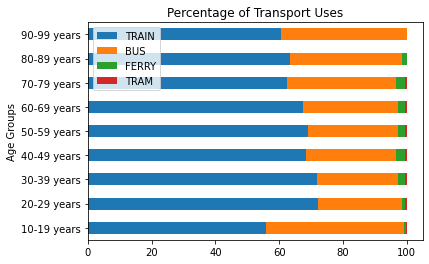

In [78]:
df = df_age.drop(["Train", "Bus", "Ferry", "Tram", "Total", "Class"], axis=1)
df['Age Groups'] = df.index
df.plot(x = "Age Groups", kind = 'barh', stacked = True, title = 'Percentage of Transport Uses')

* ***Interpretation:*** It is true as predicted that Train is the most popular among all age ranges. The working force seems to make the most use of train with roughly 70000 travellings for each age range of the working force while the figures of the other two groups are intermediately significant. Unlike working force, the youth and retiree groups use bus more often, especially youngsters aged from 10 to 19 years with more than 40% of all travellings. For ferry and tram, it appears that the percentage of these two transport modes use increase with age range and people who are older than 80 years old do not use ferry and tram.


Now we plot to see how the number of travellings of each age class varies. (Note that we have defined two classes).

<AxesSubplot:xlabel='Class', ylabel='Total'>

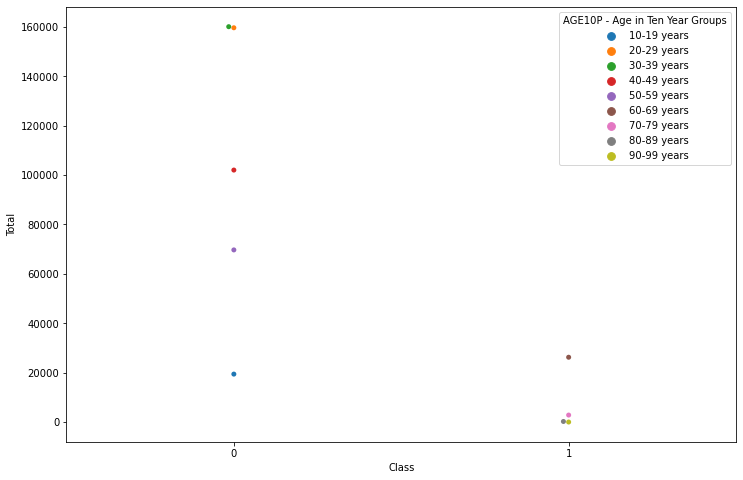

In [79]:
plt.figure(figsize=(12,8))
sns.swarmplot(x='Class', y='Total', data= df_age, hue= df_age.index)

* ***Interpretation:*** Similar to the plots for the number of travellings per age range and transport mode, class 0 as the youth and working force is recorded with the highest number of travellings of all transport modes with two peaks more than 160000. In contrast, statistics of class 1 is considerably lower with under 30000 travellings.

## Model Building 

In [80]:
df_age.drop(["TRAIN", "BUS", "FERRY", "TRAM"], axis= 1, inplace = True)

In [81]:
set(df_age['Class'])

{0, 1}

There are three classes: 
* 0 represents the youth and working force
* 1 represents the retiree

### Implement Losgistic Regression

Tran and Test sets splitting: 

In [82]:
# Split the data into training (50%) and testing data (50%) and use random_state is 7
train,test = train_test_split(df_age, test_size=0.5, random_state=7)
print(train.shape)
print(test.shape)

(4, 6)
(5, 6)


In [83]:
# Getting input data and targets for building prediction model:
X_train = train.drop(['Total', 'Class'], axis = 1)
y_train = train['Class']
X_test = test.drop(['Total', 'Class'], axis = 1)
y_test = test['Class']

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
print(X_train.head(2))
print(y_train.head(2))

X_train shape: (4, 4)
y_train shape: (4,)
X_test shape: (5, 4)
y_test shape: (5,)
                                 Train    Bus Ferry Tram
AGE10P - Age in Ten Year Groups                         
40-49 years                      69864  28815  2617  722
70-79 years                       1781    973    88   13
AGE10P - Age in Ten Year Groups
40-49 years    0
70-79 years    1
Name: Class, dtype: int64


In [84]:
# define the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [85]:
# Do predictions on test set
y_pred_train= model.predict(X_train)
y_pred_test= model.predict(X_test)
print(y_pred_train)
print(y_pred_test)

[0 1 0 0]
[0 1 1 1 1]


In [86]:
# Evaluate the performance of your trained model
print("Accuracy score on training test:", accuracy_score(y_train,y_pred_train))
print("Accuracy score on testing test:", accuracy_score(y_test,y_pred_test))

Accuracy score on training test: 1.0
Accuracy score on testing test: 0.8


In [87]:
# define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=3, random_state=7)

In [88]:
# list of accuracy score of test set
test_scores = []
test_scores.append(accuracy_score(y_test,y_pred_test))

* ***Comment:*** The accuracy scoreis 0.8 which is significantly high and suggests that the model was constructed well. However, it is possible that this model is overfitting due to the training accuracy score is 1.0 as a result of small dataset.

In [89]:
# Checking confusion metric 
print ("Confusion matrix on test set:")
print(confusion_matrix(y_test,y_pred_test))

Confusion matrix on test set:
[[1 1]
 [0 3]]


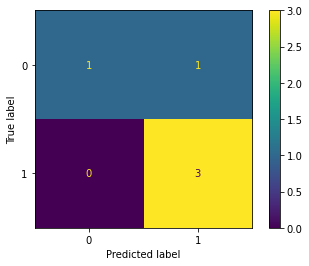

In [90]:
plot_confusion_matrix(model, X_test, y_test)

* ***Comment:*** The confusion matrix indicates 0 false negatives and 1 false positives, this resulting rate is acceptable and supports the significance of the model.

In [91]:
acc_scores = []
for i in range(1,5):
    clf = LogisticRegression(max_iter=1000)
    rfe = RFE(estimator =clf, n_features_to_select=i)
    #training model
    rfe.fit(X_train, y_train)
    #predicting on test set 
    y_pred = rfe.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)
    # print this
    print ("Acc on test set using", i, "feature: ", acc_score)
    print ("Feature which have been chosen:", X_train.columns[rfe.support_])
    print("")
    # append to the list 
    acc_scores.append(acc_score)

Acc on test set using 1 feature:  0.8
Feature which have been chosen: Index(['Bus'], dtype='object')

Acc on test set using 2 feature:  0.8
Feature which have been chosen: Index(['Train', 'Bus'], dtype='object')

Acc on test set using 3 feature:  0.8
Feature which have been chosen: Index(['Train', 'Bus', 'Ferry'], dtype='object')

Acc on test set using 4 feature:  0.8
Feature which have been chosen: Index(['Train', 'Bus', 'Ferry', 'Tram'], dtype='object')



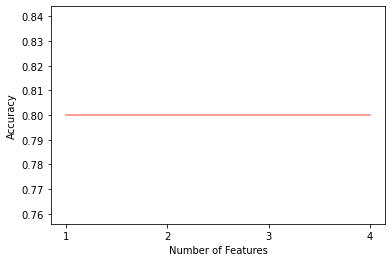

In [92]:
# Plotting the accuracy number
plotting = plt.plot(range(1, X_train.shape[1]+1), acc_scores, color= "salmon")
plt.xlabel("Number of Features")
plt.ylabel("Accuracy")
plt.xticks(np.arange(1, 5 , step=1))
plt.show()

* ***Comment:*** RFE suggests that the accuracy remains the same for the selection of features. Therefore, we choose all four features to conduct a model and prevent the overfitting problem.

Cross Validation Testing

In [93]:
X= df_age.drop(["Total", "Class"], axis= 1)
y= df_age["Class"]

In [94]:
lr = LogisticRegression(max_iter=1000)
scores = cross_val_score(lr, X, y, scoring='accuracy', cv=3)
print('Accuracy range for Logistic Regression: [%.4f, %.4f]; mean: %.4f; std: %.4f\n'
      % (scores.min(), scores.max(), scores.mean(), scores.std()))
test_scores.append(scores.mean())

Accuracy range for Logistic Regression: [0.6667, 1.0000]; mean: 0.7778; std: 0.1571



### K-Nearest Neighbours Classifier

Train and Test sets Splitting

In [95]:
# choosing the nearest 3 neighbours
clf_knn = KNeighborsClassifier(n_neighbors=3)
clf_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [96]:
# do prediction
train_pred = clf_knn.predict(X_train)
test_pred = clf_knn.predict(X_test)

In [97]:
print("Accuracy of the train set:", accuracy_score(y_train, train_pred))
print("Accuracy of the test set:", accuracy_score(y_test, test_pred))
test_scores.append(accuracy_score(y_test, test_pred))

Accuracy of the train set: 0.75
Accuracy of the test set: 0.4


* ***Comment:*** Both accuracy scores of the train and test set is considerably lower than the result of Logistic Regression.

Cross Validation Testing

In [98]:
knn = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(knn, X, y, scoring='accuracy', cv=2)
print('Accuracy range for K-Nearest Neighbours: [%.4f, %.4f]; mean: %.4f; std: %.4f\n'
      % (scores.min(), scores.max(), scores.mean(), scores.std()))
test_scores.append(scores.mean())

Accuracy range for K-Nearest Neighbours: [0.7500, 0.8000]; mean: 0.7750; std: 0.0250



### Gaussian Naive Bayes

Train and Test set splitting

In [99]:
# train the model
clf_gnb = GaussianNB()
clf_gnb.fit(X_train, y_train)

GaussianNB()

In [100]:
# do prediction
train_pred = clf_gnb.predict(X_train)
test_pred = clf_gnb.predict(X_test)

In [101]:
print("Accuracy of the train set:", accuracy_score(y_train, train_pred))
print("Accuracy of the test set:", accuracy_score(y_test, test_pred))
test_scores.append(accuracy_score(y_test, test_pred))

Accuracy of the train set: 1.0
Accuracy of the test set: 0.4


* ***Comment:*** The accuracy of the test set is the lowest of all three models that we have conducted so far while the accuracy of the train set reaches 1.0 which can indicate the a overfitting model.

Cross Validation Testing

In [102]:
gnb = GaussianNB()
scores = cross_val_score(gnb, X, y, scoring='accuracy', cv=5)
print('Accuracy range for Gaussian Naive Bayes: [%.4f, %.4f]; mean: %.4f; std: %.4f\n'
      % (scores.min(), scores.max(), scores.mean(), scores.std()))
test_scores.append(scores.mean())

Accuracy range for Gaussian Naive Bayes: [0.5000, 1.0000]; mean: 0.9000; std: 0.2000



* ***Comment:*** The mean accuracy score of the Gaussian Naive Bayes is significantly high with 0.9 after using the cross validation testing.

### Multi-layer Perceptron

Train and Test Sets Splitting

In [103]:
# train the model
clf_nn = MLPClassifier(max_iter=800,solver="lbfgs",activation="tanh",random_state=42)
clf_nn.fit(X_train, y_train)

MLPClassifier(activation='tanh', max_iter=800, random_state=42, solver='lbfgs')

In [104]:
# do prediction
train_pred = clf_nn.predict(X_train)
test_pred = clf_nn.predict(X_test)

In [105]:
print("Accuracy of the train set:", accuracy_score(y_train, train_pred))
print("Accuracy of the test set:", accuracy_score(y_test, test_pred))
test_scores.append(accuracy_score(y_test, test_pred))

Accuracy of the train set: 1.0
Accuracy of the test set: 0.6


* ***Comment:*** The result is roughly the same as that of Gaussian Naives Bayes which also shows the possible overfitting problem.

Cross Validation Testing 

In [106]:
nn =  MLPClassifier(max_iter=800, solver="lbfgs",activation="tanh",random_state=42)
scores = cross_val_score(nn, X, y, scoring='accuracy', cv=4)
print('Accuracy range for Gaussian Naive Bayes: [%.4f, %.4f]; mean: %.4f; std: %.4f\n'
      % (scores.min(), scores.max(), scores.mean(), scores.std()))
test_scores.append(scores.mean())

Accuracy range for Gaussian Naive Bayes: [0.6667, 1.0000]; mean: 0.9167; std: 0.1443



* ***Comment:*** The mean accuracy score is as high as the result of the Gaussian Naives Bayes model using cross validation test.

### Choosing the Best Model

In [107]:
# dataframe of accuracy scores
models = ["LR_Split", "LR_CV", "KNN_Split", "KNN_CV", "GNB_Split",
         "GNB_CV", "MLP_Split", "MLP_CV"]
df_acc = pd.DataFrame(models, columns=["Model Type"])
df_acc["Accuracy"] = test_scores

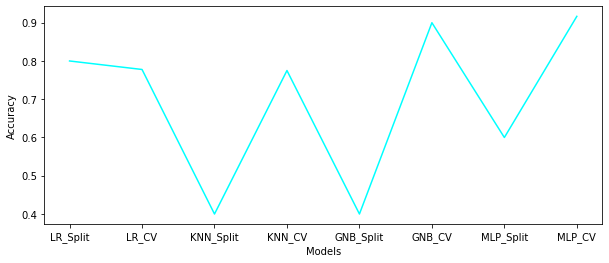

In [108]:
# Plotting the accuracy number
plt.figure (figsize = (10,4))
plt.plot(df_acc["Model Type"], df_acc["Accuracy"], color= "aqua")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.show()

* ***Interpretation:*** Of all the models that we have conducted so far, it appears that the Logistics Regression model comes up with the most stable result with 0.8 and 0.78 for the train test splitting and cross validation testing respectively. In contrast, for the rest three models, the differences of the model results when conducting in two ways are considerably high which will refect the prediction well enough. Therefore, the Logistics Regression model should be applied to predict the age groups based on the transport uses.

## Conclusion

The age group dataset used in this section have to be modified carefully. Firstly we remove logo and title which we did the same for the second dataset. Then, we have to remove outliers since there are two groups with zero-records. Also, we have to recalculate the total field to minimise the incorrect data. The most noticeable feature in this dataset is that the size of the dataset is small, thus it may lead to the overfitting model.

We repeated the same data exploration steps as in the second dataset to discover the relationship between each age group and the uses of each transport service modes.

Since there are significant differences in the results of GNB, KNN and MLPClassifier models which might be due to the dataset size (affect on the constant train and test set using the split method), it is reasonable to not choose them as the best predicted result to avoid the overfitting and incorrect prediction. On the other hand, we will choose the Logistic Regression model which has the stable accuracy scores through two testing methods (train-test split and cross validation) to be the best learning result in this case (although it might not be very good model since the limited dataset size).

# Identifying and Clustering the Uses of Transport Modes

## Data Summary and Manipulation

We use the dataset taken from the [OpenData of Transport NSW](https://opendata.transport.nsw.gov.au/dataset/opal-trips-all-modes) which recorded the monthly transport uses from July 2016 to July 2021. The transport modes included in the dataset that we will analyse on are train, bus, ferry, light rail, and metro. The dataset is in the `xlsx` format, and the file name of it is `transportmodecount`. We will use this dataset to identify some common pattern between the recorded months, and also cluster these months to see if there is any high transport-use volume months.

*_Process:_*
- Data summary and manipulation: clean the null values in the metro field by filling 0; do simple summary such as decribing the mean, max and min of each field in the dataset.
- Data exploration: We explore the trend of the transport uses (increase or decrease on a period), then do clustering to see if there is any specific group of transport usage.

*_Aim:_*
To explore if there is any specific month that citizens use transport frequently; this then could be use to improve the transport service such as adding more trips on the high-demand months, or could be used to analyse the factors or reasons why the uses of service decreased on a certain period.

### Import File and Create Dataframe

In [4]:
# import the excel file
df_transport = pd.read_excel("File/transportmodecount.xlsx",index_col=0)

# Transpose row to column
df_transport = df_transport.T

# remove the last row "Grand Total"
df_transport = df_transport.drop("Grand Total", axis=0)

# remove time from the index
df_transport.index = pd.to_datetime(df_transport.index).date

df_transport.head(6)

Transport Modes,Bus,Ferry,Light rail,Metro,Train,Grand Total
2016-07-01,21198509.0,1213712.0,827732.0,NaN,28819249.0,52059202.0
2016-08-01,25210772.0,1095055.0,840800.0,NaN,32393980.0,59540607.0
2016-09-01,23011540.0,1143718.0,758073.0,NaN,30648352.0,55561683.0
2016-10-01,23095302.0,1281152.0,776960.0,NaN,30106833.0,55260247.0
2016-11-01,24422383.0,1302501.0,705265.0,NaN,31318279.0,57748428.0
2016-12-01,20880865.0,1506986.0,726521.0,NaN,28189584.0,51303956.0


### Deal with Outliers

We will check if there is any NaN value.

In [7]:
df_transport.isna().sum()

Transport\nModes
Bus             0
Ferry           0
Light rail      0
Metro          34
Train           0
Grand Total     0
dtype: int64

* ***Comment:*** There are 34 null values in the Metro field. The metro service in NSW began from 2019, every month before 2019 therefore will not have data in the metro field. As such, we will fill in 0 to all the `NaN` values.

In [8]:
df_transport = df_transport.fillna(0)

### Data Summary

In [9]:
df_transport.shape

(61, 6)

In [10]:
df_transport.describe()

Transport Modes,Bus,Ferry,Light rail,Metro,Train,Grand Total
count,6.100000e+01,6.100000e+01,6.100000e+01,6.100000e+01,6.100000e+01,6.100000e+01
mean,2.115637e+07,1.062945e+06,9.882385e+05,5.808296e+05,2.755950e+07,5.134788e+07
std,5.740788e+06,4.100610e+05,4.227730e+05,7.629534e+05,8.269252e+06,1.415594e+07
min,5.094308e+06,8.083200e+04,1.937200e+05,0.000000e+00,5.266764e+06,1.108138e+07
25%,1.703207e+07,6.772650e+05,8.152370e+05,0.000000e+00,2.103861e+07,4.195683e+07
50%,2.306499e+07,1.179849e+06,8.587270e+05,0.000000e+00,3.027515e+07,5.624810e+07
75%,2.532301e+07,1.302501e+06,9.986650e+05,1.162246e+06,3.345712e+07,6.048659e+07
max,2.874222e+07,1.738083e+06,2.180906e+06,2.206777e+06,3.756212e+07,6.844949e+07


## Data Exploration

* **Plotting the trends of all transport modes**

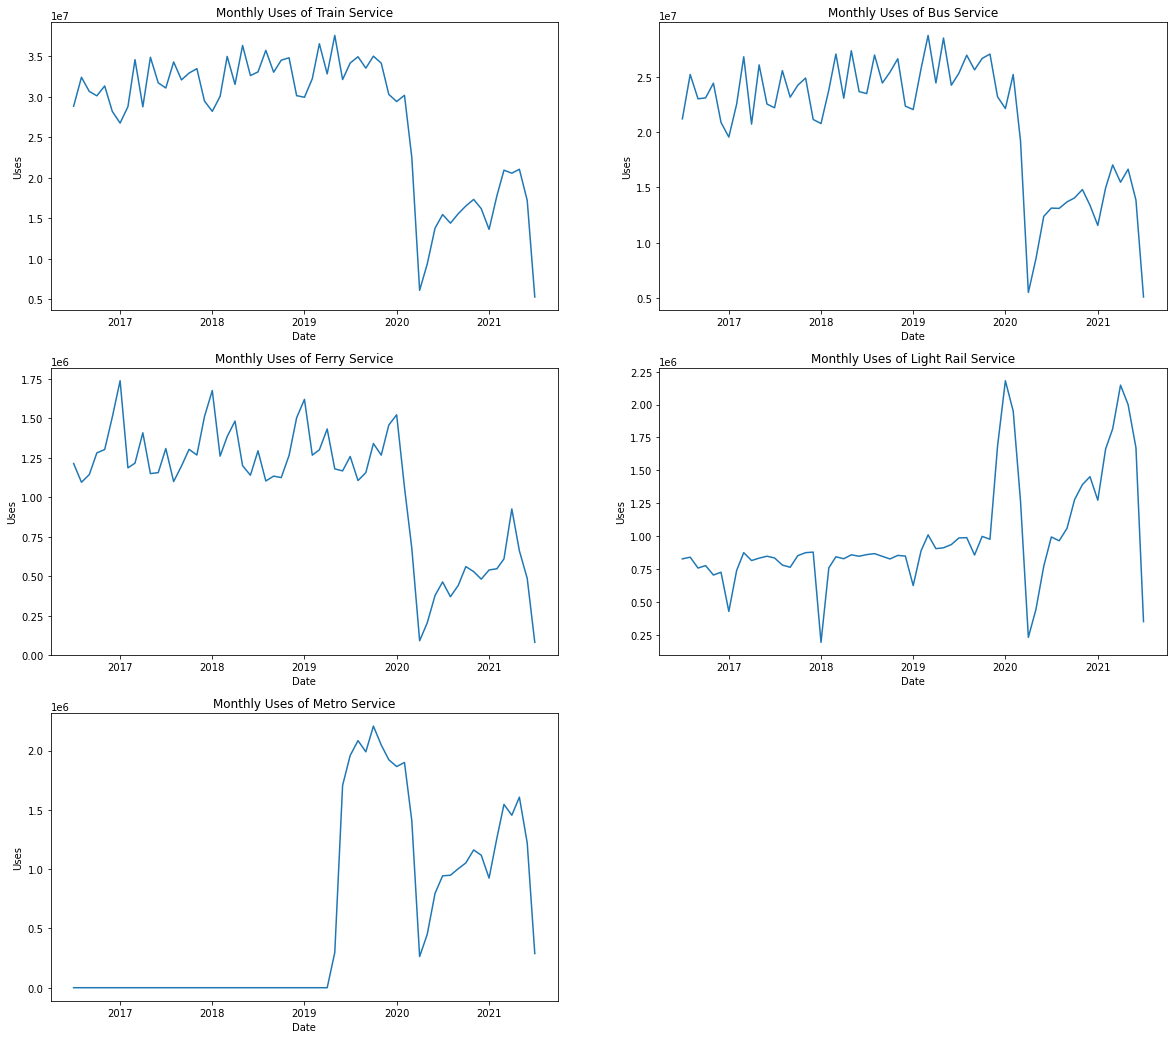

In [11]:
plt.figure(figsize=(20,18))

# Train service
plt.subplot(3,2,1)
plt.title("Monthly Uses of Train Service")
plt.xlabel("Date")
plt.ylabel("Uses")
plt.plot(df_transport["Train"])

# Bus service
plt.subplot(3,2,2)
plt.title("Monthly Uses of Bus Service")
plt.xlabel("Date")
plt.ylabel("Uses")
plt.plot(df_transport["Bus"])

# Ferry service
plt.subplot(3,2,3)
plt.title("Monthly Uses of Ferry Service")
plt.xlabel("Date")
plt.ylabel("Uses")
plt.plot(df_transport["Ferry"])

# Light Rail service
plt.subplot(3,2,4)
plt.title("Monthly Uses of Light Rail Service")
plt.xlabel("Date")
plt.ylabel("Uses")
plt.plot(df_transport["Light rail"])

# Metro service
plt.subplot(3,2,5)
plt.title("Monthly Uses of Metro Service")
plt.xlabel("Date")
plt.ylabel("Uses")
plt.plot(df_transport["Metro"])

* ***Interpretation:*** 
The most population public transport is Train service following by Bus, then Ferry and Light Rail. The Metro service came into practice recently around the middle of year 2019. In 2020 in each graph, we can see the public transport has dropped dramatically since the Covid19 and lockdown started. After few months, everyone slowly use the public transport again as a matter of consequential restrictions. The plots start increasing again in the amount of using public transport included Train, Ferry, Bus, Light Rail and Metro. The least popular transport within 5 of them is Ferry as its peak is just 1.75e+06 while the peak of train equals 3.7e+07, bus equals around 3e+07, light rail is 2.25e+06 and more than 2.0e+06 in Metro. 

* **Clustering**

In [12]:
#Drop the column "Grand Total" for clustering
transportmodes = df_transport.drop(columns=['Grand Total'])
transportmodes.head(6)

Transport Modes,Bus,Ferry,Light rail,Metro,Train
2016-07-01,21198509.0,1213712.0,827732.0,0.0,28819249.0
2016-08-01,25210772.0,1095055.0,840800.0,0.0,32393980.0
2016-09-01,23011540.0,1143718.0,758073.0,0.0,30648352.0
2016-10-01,23095302.0,1281152.0,776960.0,0.0,30106833.0
2016-11-01,24422383.0,1302501.0,705265.0,0.0,31318279.0
2016-12-01,20880865.0,1506986.0,726521.0,0.0,28189584.0


In [13]:
dist = pdist(transportmodes,'euclidean')
linkage_matrix = linkage(dist, method = 'complete')

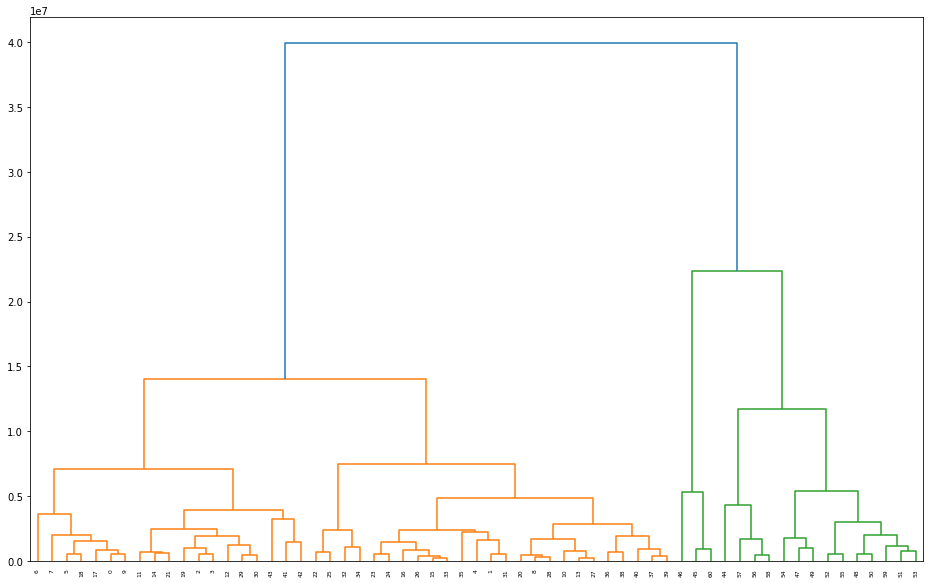

In [126]:
# Dendrogram for hierarchical clustering
plt.figure(figsize=(16,10))
dendrogram(linkage_matrix)
plt.show()

In [14]:
labels = cut_tree(linkage_matrix, n_clusters=3)
transportmodes['label'] = labels
transportmodes

Transport Modes,Bus,Ferry,Light rail,Metro,Train,label
2016-07-01,21198509.0,1213712.0,827732.0,0.0,28819249.0,0
2016-08-01,25210772.0,1095055.0,840800.0,0.0,32393980.0,0
2016-09-01,23011540.0,1143718.0,758073.0,0.0,30648352.0,0
2016-10-01,23095302.0,1281152.0,776960.0,0.0,30106833.0,0
2016-11-01,24422383.0,1302501.0,705265.0,0.0,31318279.0,0
...,...,...,...,...,...,...
2021-03-01,17032074.0,609963.0,1816634.0,1546314.0,20925803.0,1
2021-04-01,15471111.0,926107.0,2147622.0,1454810.0,20552499.0,1
2021-05-01,16650452.0,660979.0,1999285.0,1607509.0,21038609.0,1
2021-06-01,13859329.0,486379.0,1672701.0,1222024.0,17193476.0,1


In [15]:
transportmodes['label'].value_counts()

0    44
1    14
2     3
Name: label, dtype: int64

In [16]:
#Months labeled as cluster 2
transportmodes[transportmodes['label']==2]

Transport Modes,Bus,Ferry,Light rail,Metro,Train,label
2020-04-01,5504822.0,91230.0,232032.0,262852.0,6095725.0,2
2020-05-01,8549735.0,203728.0,443833.0,449327.0,9323674.0,2
2021-07-01,5094308.0,80832.0,351308.0,288173.0,5266764.0,2


In [17]:
#Months labeled as cluster 1
transportmodes[transportmodes['label']==1]

Transport Modes,Bus,Ferry,Light rail,Metro,Train,label
2020-03-01,19191569.0,677265.0,1264683.0,1408500.0,22506278.0,1
2020-06-01,12386023.0,377351.0,772279.0,795627.0,13762670.0,1
2020-07-01,13132371.0,463754.0,994370.0,943774.0,15446904.0,1
2020-08-01,13107189.0,369977.0,965468.0,948902.0,14385299.0,1
2020-09-01,13690626.0,441991.0,1059605.0,1003812.0,15556289.0,1
2020-10-01,14059038.0,560732.0,1277545.0,1052802.0,16502457.0,1
2020-11-01,14809745.0,529113.0,1391815.0,1162246.0,17317270.0,1
2020-12-01,13391873.0,481290.0,1452246.0,1117564.0,16173796.0,1
2021-01-01,11567325.0,539271.0,1273629.0,924685.0,13616536.0,1
2021-02-01,14964876.0,547260.0,1663207.0,1263058.0,17765453.0,1


In [18]:
#Months labeled as cluster 0
transportmodes[transportmodes['label']==0]

Transport Modes,Bus,Ferry,Light rail,Metro,Train,label
2016-07-01,21198509.0,1213712.0,827732.0,0.0,28819249.0,0
2016-08-01,25210772.0,1095055.0,840800.0,0.0,32393980.0,0
2016-09-01,23011540.0,1143718.0,758073.0,0.0,30648352.0,0
2016-10-01,23095302.0,1281152.0,776960.0,0.0,30106833.0,0
2016-11-01,24422383.0,1302501.0,705265.0,0.0,31318279.0,0
2016-12-01,20880865.0,1506986.0,726521.0,0.0,28189584.0,0
2017-01-01,19550895.0,1738083.0,428998.0,0.0,26735422.0,0
2017-02-01,22534683.0,1186315.0,740308.0,0.0,28767036.0,0
2017-03-01,26811115.0,1216242.0,875062.0,0.0,34566385.0,0
2017-04-01,20723045.0,1408468.0,815237.0,0.0,28745729.0,0


In [19]:
#Months with no metro usage (before the construction of the Metro service in NSW)
transportmodes[transportmodes['Metro']==0]

Transport Modes,Bus,Ferry,Light rail,Metro,Train,label
2016-07-01,21198509.0,1213712.0,827732.0,0.0,28819249.0,0
2016-08-01,25210772.0,1095055.0,840800.0,0.0,32393980.0,0
2016-09-01,23011540.0,1143718.0,758073.0,0.0,30648352.0,0
2016-10-01,23095302.0,1281152.0,776960.0,0.0,30106833.0,0
2016-11-01,24422383.0,1302501.0,705265.0,0.0,31318279.0,0
2016-12-01,20880865.0,1506986.0,726521.0,0.0,28189584.0,0
2017-01-01,19550895.0,1738083.0,428998.0,0.0,26735422.0,0
2017-02-01,22534683.0,1186315.0,740308.0,0.0,28767036.0,0
2017-03-01,26811115.0,1216242.0,875062.0,0.0,34566385.0,0
2017-04-01,20723045.0,1408468.0,815237.0,0.0,28745729.0,0


### Mean for each Cluster

In [20]:
transportmodes.groupby(['label']).agg('mean')

Transport Modes,Bus,Ferry,Light rail,Metro,Train
label,,,,,
0,2.427446e+07,1.290736e+06,8.978248e+05,4.086051e+05,3.222045e+07
1,1.452240e+07,5.479594e+05,1.410792e+06,1.175116e+06,1.733881e+07
2,6.382955e+06,1.252633e+05,3.423910e+05,3.334507e+05,6.895388e+06


* ***Comment:*** By observing the table, the first cluster (cluster 0) including all the moth with the highest number of uses in Train, Bus and Ferry, also the second highest uses of Light rail and Metro, on average. The lowest average of uses in transport service could be seen in the last cluster (cluster 2).

### Data Interpretation
From the hierarchical clustering of the data, we divided the data into 3 clusters, labeled [0,1,2], with 0 being approximately the cluster with the highest figures recorded - indicating months with the most frequent transport use, followed by 1 and finally 2 - the cluster with the lowest figures recorded, which indicates periods where people in NSW commute the least. 

There are 44 months labeled as cluster 0. Notably, all of these months were prior to 2021, with the vast majority being between 2016 and 2019 while only the first two months of 2020 are included of the cluster. 14 months are labeled as cluster 1, with 8 months in 2020 and the 6 first months of 2021. The 3 remaining months are part of cluster 2, the months with the least transport usage, which consists of April and May 2020 and July 2021. 

From the information collected and interpreted, we can see that public transport was considerably more popular in the earlier years of the study (2016 to 2019), and even the lack of metro service did not affect the numbers, as we could see that all the months before the introduction of the metro service are in cluster 0, the cluster with the highest numbers. 

The drop in the public transport usage figures in the months in cluster 1, which consists of March 2020 and the period from June 2020 to June 2021, is likely due to the COVID-19 outbreak, where laws limiting transport are applied, and the pandemic may also affect people's decision to take public transport to an extent. This is also very likely the reason for the massive drop in the usage of public transport in the months in cluster 2, which are April and May 2020 as well as July 2021. Coincidentally, April 2020 was the month when Australia's borders were closed and lockdowns started. The lack of commuting to airports as well as the tighter applications of stay-at-home orders definitely contributed to the drop in transportation numbers. June 2020 was when the lockdown was lifted, therefore figures began to steadily rise up. July 2021 marked another lockdown in NSW, which accounts for the large drop in public transport usage.

## Clustering Reflection
With our original goal of finding specific months with frequent usage of public transport, the clustering method is not the most suitable for it, as many months were labeled as having high public transport usage. The relatively small sample size of 5 years, which means only 5 data points of each month, also prevents our aim from succeeding. What we could deduce from the data summary is that public transport usage was much higher between 2016 and 2019 than it is from 2020 onwards.

However, the clustering method did a decent job in finding specific months with low public transport usage, which could be reflected based on the real-life COVID-19 pandemic situation.